# Loading Data

This section describes how to load the dataset into a pandas DataFrame and perform initial checks.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/raw_analyst_ratings.csv")

In [2]:
print(df.head())
print(df.describe())
print(df.info())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

# Exploratory Data Analysis (EDA)

## Descriptive Statistics

### a. Text Length Analysis

In [3]:
# Get headline length statistics
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

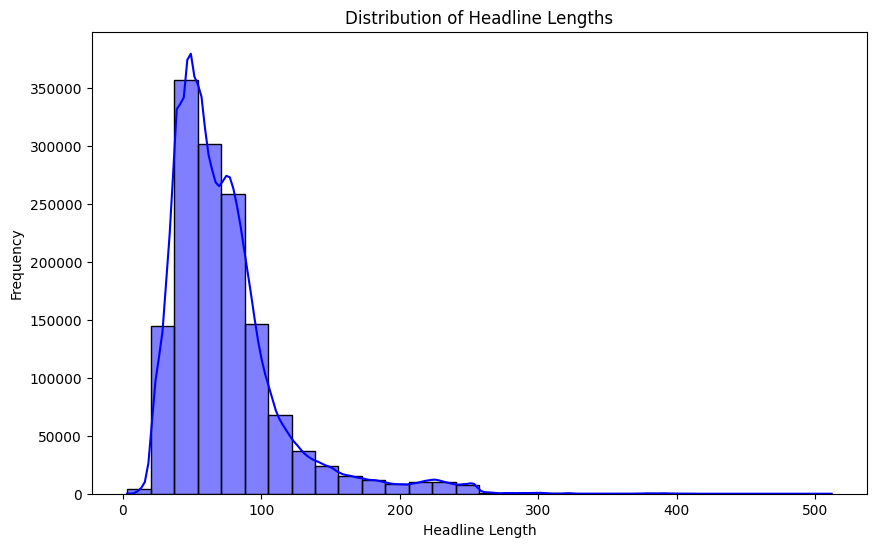

In [5]:
# Visualize headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

### b. Publisher Count

In [6]:
# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


/tmp/ipykernel_26879/400908620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


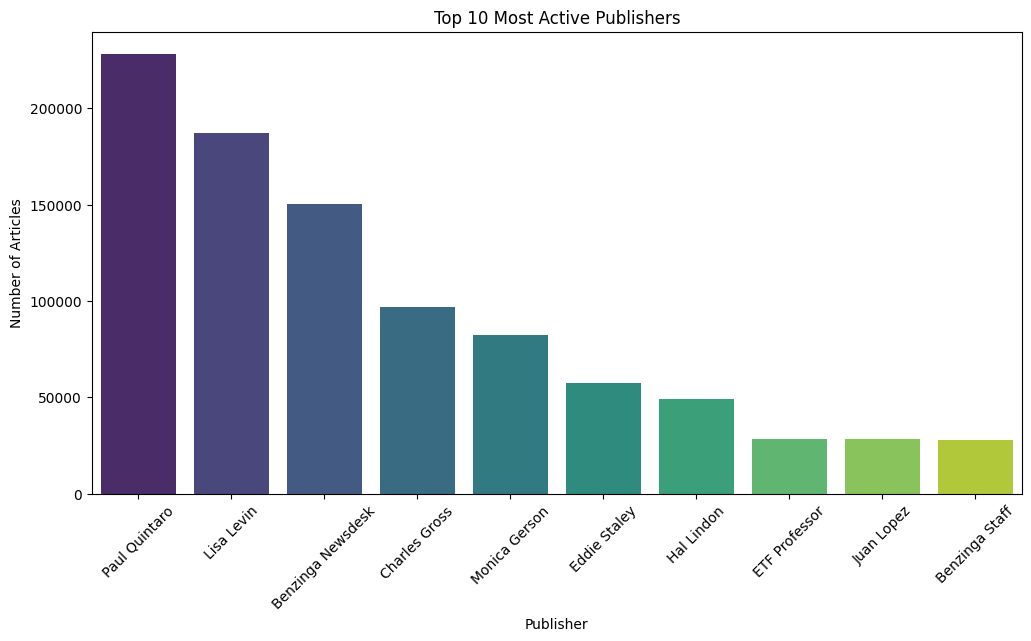

In [7]:
# Visualize top 10 publishers
top_publishers = publisher_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


### c. Publication Date Trends


In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
publication_trends = df.groupby(['year', 'month']).size()
print(publication_trends)

year    month
2011.0  4.0         6
        5.0        78
        6.0        96
        7.0       137
        8.0       149
                 ... 
2020.0  2.0      2356
        3.0      4680
        4.0      4616
        5.0      9333
        6.0      5990
Length: 111, dtype: int64


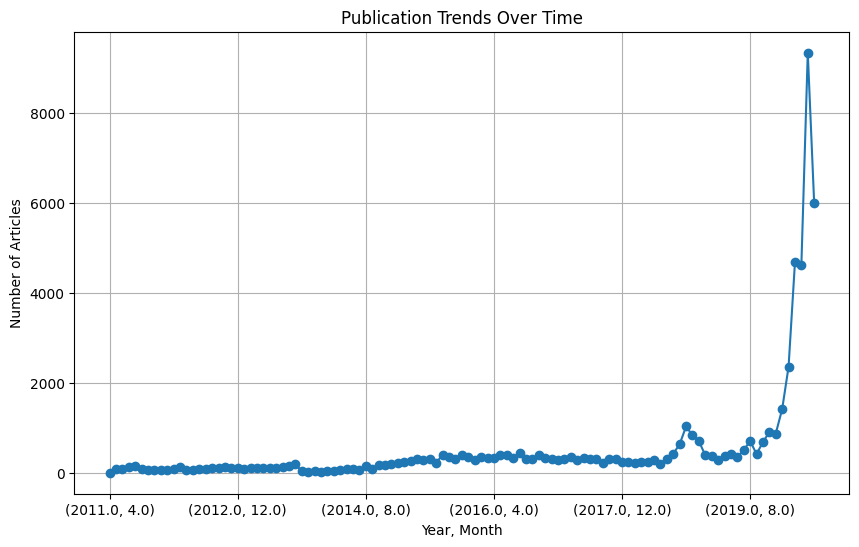

In [10]:
# Plot publication trends over time
plt.figure(figsize=(10, 6))
publication_trends.plot(kind='line', marker='o')
plt.title('Publication Trends Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

## Text Analysis(Sentiment analysis & Topic Modeling):

### Sentiment Analysis

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each headline
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(df['sentiment'].describe())

count    1.407328e+06
mean     6.650410e-02
std      2.714077e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64


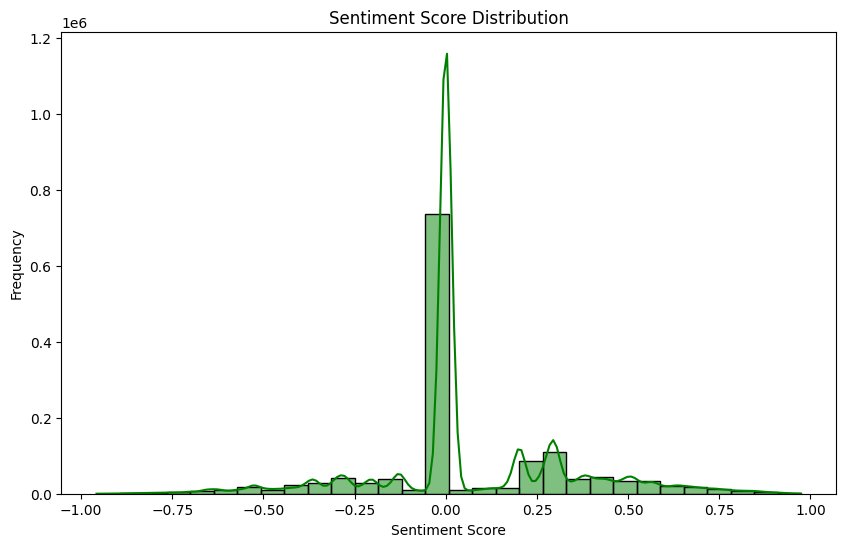

In [12]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='green', bins=30)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Topic Modeling / Topic Extraction


In [14]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer


# Create TF-IDF matrix

tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
sample_df = df.sample(frac=0.2, random_state=42)  # 20% sample
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_df['headline'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)



LatentDirichletAllocation(n_components=5, random_state=42)

In [15]:
# Display the topics with their top words
feature_names = tfidf_vectorizer.get_feature_names_out()

for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([feature_names[i] for i in topic.argsort()[-10:]])  # Top 10 words for each topic


Topic #0:
['q1', 'moving', 'q4', 'sees', 'session', 'reports', 'sales', 'eps', 'est', 'vs']
Topic #1:
['benzinga', 'industry', 'analyst', 'update', 'downgrades', '52', 'stock', 'new', 'week', 'stocks']
Topic #2:
['financial', 'morning', 'companies', 'lower', 'energy', 'higher', 'trading', 'announces', 'market', 'shares']
Topic #3:
['etfs', 'bank', 'scheduled', 'maintains', 'target', 'price', 'raises', 'pt', 'buy', 'earnings']
Topic #4:
['option', 'alert', 'year', 'biggest', 'movers', '10', 'share', 'reports', 'benzinga', 'says']


## Time Series Analysis

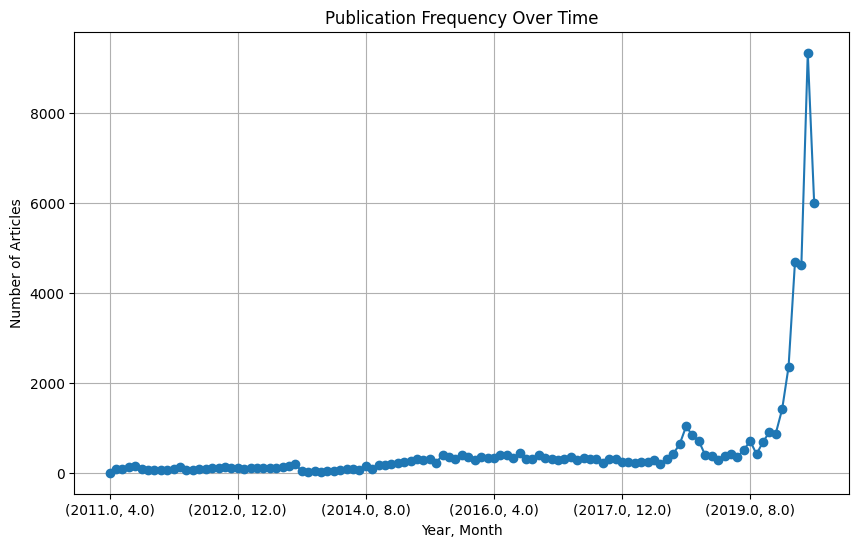

In [16]:
import matplotlib.pyplot as plt

# Group the data by year and month for time series analysis
time_series_data = df.groupby(['year', 'month']).size()

# Plot the publication frequency
plt.figure(figsize=(10, 6))
time_series_data.plot(kind='line', marker='o')
plt.title('Publication Frequency Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


## Publisher Analysis

In [17]:
# Publisher contribution analysis
top_publishers = df['publisher'].value_counts().head(10)
print(top_publishers)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


/tmp/ipykernel_26879/822175410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


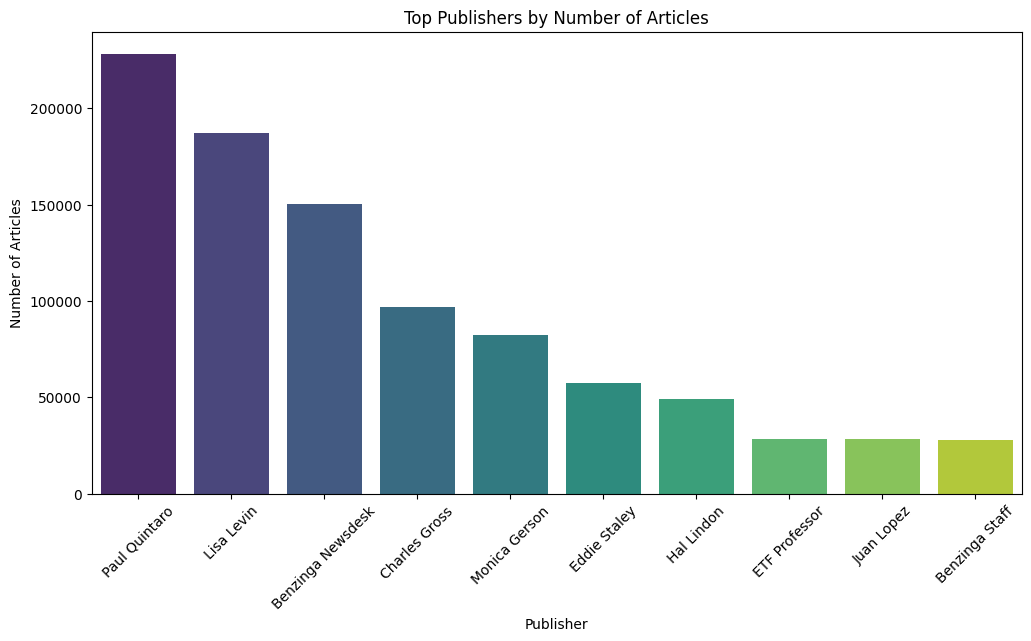

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")
plt.title('Top Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
